In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Load the dataset
file_path = 'abc.xlsx'  # Replace with the actual file path
data = pd.read_excel(file_path)

# Define features (X) and target (y)
feature_columns = ['age', 'no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
                   'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
                   'maximum_days_inactive', 'customer_support_calls']
target_column = 'churn'

In [5]:
X = data[feature_columns]
y = data[target_column]

# Encode categorical data if present
categorical_columns = ['multi_screen', 'mail_subscribed', 'gender']
for col in categorical_columns:
    if col in data.columns:
        encoder = LabelEncoder()
        encoded_col = encoder.fit_transform(data[col])
        X[col] = encoded_col

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/var/folders/7s/n68514zx0gn9k2k10s63pf4m0000gn/T/ipykernel_64734/507198446.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoded_col
/var/folders/7s/n68514zx0gn9k2k10s63pf4m0000gn/T/ipykernel_64734/507198446.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoded_col
/var/folders/7s/n68514zx0gn9k2k10s63pf4m0000gn/T/ipykernel_64734/507198446.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [7]:
# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate geometric mean (G-Mean)
# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
g_mean = np.sqrt(sensitivity * specificity)

Accuracy: 0.88
Precision: 0.59
Recall: 0.29
F1 Score: 0.39
Geometric Mean (G-Mean): 0.53


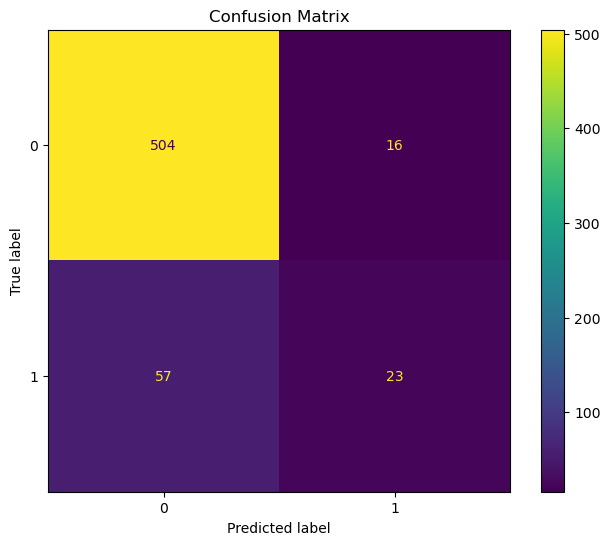

In [9]:
# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Geometric Mean (G-Mean): {g_mean:.2f}")

# Display confusion matrix visually
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()